In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [3]:
path=r"C:\Users\HP\Desktop\CODE\DATA ANALYSIS with PYTHON\cleaned_data_for 2.1(old car data).csv"
df=pd.read_csv(path)

df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower_binned
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,11.190476,low
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,11.190476,low
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,12.368421,medium
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,9.791667,low
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,13.055556,low


# Out-Sample-testing:

### 1.Train_test_split():

In [4]:
#first seperating the independent variables and target variable:

In [5]:
y_data=df['price']#our target variable is y_data

x_data=df.drop('price',axis=1)#our independent variables are in x_data dataframe

In [6]:
y_data.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [7]:
x_data.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,highway-L/100km,horsepower_binned
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,3.47,2.68,9.0,111.0,5000.0,21,27,11.190476,11.190476,low
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,3.47,2.68,9.0,111.0,5000.0,21,27,11.190476,11.190476,low
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,2.68,3.47,9.0,154.0,5000.0,19,26,12.368421,12.368421,medium
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,3.19,3.40,10.0,102.0,5500.0,24,30,9.791667,9.791667,low
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,3.19,3.40,8.0,115.0,5500.0,18,22,13.055556,13.055556,low


Splitting the x_data and y_data into Training and Testing data:

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=0)

In [9]:
x_train.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,highway-L/100km,horsepower_binned
96,0,106.0,nissan,four,hatchback,fwd,front,97.2,0.833253,0.905556,...,3.33,3.47,8.5,97.0,5200.0,27,34,8.703704,8.703704,low
181,2,94.0,volkswagen,four,sedan,fwd,front,97.3,0.825084,0.909722,...,3.19,3.40,9.0,85.0,5250.0,27,34,8.703704,8.703704,low
19,0,81.0,chevrolet,four,sedan,fwd,front,94.5,0.763095,0.883333,...,3.03,3.11,9.6,70.0,5400.0,38,43,6.184211,6.184211,low
153,0,91.0,toyota,four,hatchback,fwd,front,95.7,0.799135,0.894444,...,3.19,3.03,9.0,70.0,4800.0,30,37,7.833333,7.833333,low
92,1,128.0,nissan,two,hatchback,fwd,front,94.5,0.795771,0.886111,...,3.15,3.29,9.4,69.0,5200.0,31,37,7.580645,7.580645,low


In [10]:
y_train.head()

96     8949.0
181    8195.0
19     6575.0
153    7198.0
92     7799.0
Name: price, dtype: float64

In [11]:
x_test.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,highway-L/100km,horsepower_binned
18,1,98.0,chevrolet,two,hatchback,fwd,front,94.5,0.749159,0.883333,...,3.03,3.11,9.6,70.0,5400.0,38,43,6.184211,6.184211,low
170,-1,65.0,toyota,four,sedan,fwd,front,102.4,0.843825,0.923611,...,3.27,3.35,22.5,73.0,4500.0,30,33,7.833333,7.833333,low
107,0,122.0,peugot,four,wagon,rwd,front,114.2,0.955790,0.950000,...,3.70,3.52,21.0,95.0,4150.0,25,25,9.400000,9.400000,low
98,0,128.0,nissan,four,sedan,fwd,front,100.4,0.873138,0.923611,...,3.43,3.27,9.0,152.0,5200.0,17,22,13.823529,13.823529,medium
177,-1,122.0,toyota,four,wagon,rwd,front,104.5,0.902451,0.923611,...,3.27,3.35,9.2,156.0,5200.0,19,24,12.368421,12.368421,medium


In [12]:
y_test.head()

18      6295.0
170    10698.0
107    13860.0
98     13499.0
177    15750.0
Name: price, dtype: float64

In [13]:
#note-the splitted data is random,i.e. it has chosen 30 percent data randomly and not in bunch from the dataset

Training our model using training data:

In [14]:
# SLR using engine size:
lm1=LinearRegression()
lm1.fit(x_train[['engine-size']],y_train)


LinearRegression()

In [15]:
#IN SAMPLE EVALUATIONS:
seen_data_yhat1=lm1.predict(x_train[['engine-size']])
seen_data_yhat1[0:5]
#this is what our model has predicted on the already seen data

array([11771.18462081, 10078.89154782,  7155.8398763 ,  8386.59847484,
        8232.75365002])

C:\Users\HP\AppData\Local\Temp\ipykernel_3684\708058533.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(y_train,hist=False,color='r')
C:\Users\HP\AppData\Local\Temp\ipykernel_3684\708058533.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(seen_data_yhat1,hist=False,c

<Axes: xlabel='price', ylabel='Density'>

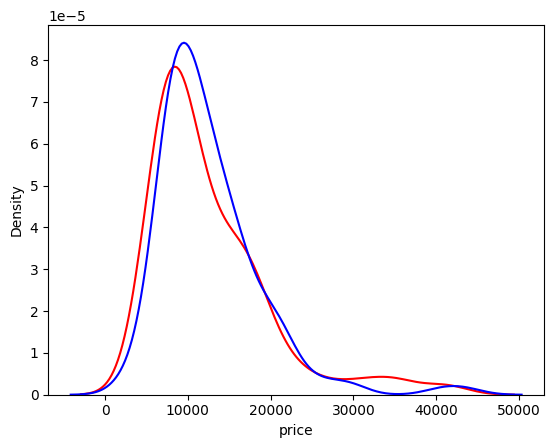

In [16]:
#plotting distribution of predicted values of seen data
ax1=sns.distplot(y_train,hist=False,color='r')
sns.distplot(seen_data_yhat1,hist=False,color='b',ax=ax1)

In [17]:
# OUT SAMPLE EVALUATION:
unseen_data_yhat1=lm1.predict(x_test[['engine-size']])
unseen_data_yhat1[0:5]
#this is what our model has predicted on unseen values of engine size

array([ 7155.8398763 , 10232.73637264, 16694.21901495, 21155.71893464,
       18078.8224383 ])

C:\Users\HP\AppData\Local\Temp\ipykernel_3684\2110258987.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2=sns.distplot(y_train,hist=False,color='r')
C:\Users\HP\AppData\Local\Temp\ipykernel_3684\2110258987.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unseen_data_yhat1,hist=Fal

<Axes: xlabel='price', ylabel='Density'>

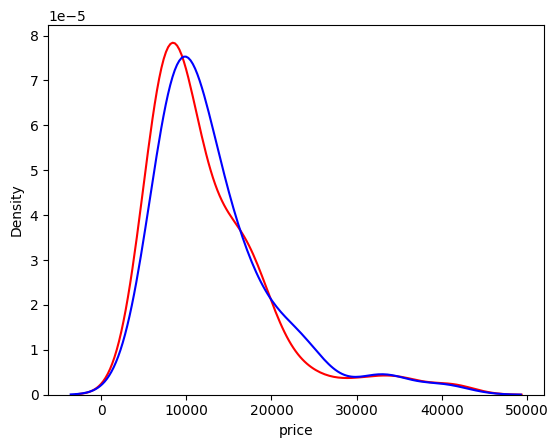

In [18]:
#plotting distribution of predicted values of useen data
ax2=sns.distplot(y_train,hist=False,color='r')
sns.distplot(unseen_data_yhat1,hist=False,color='b',ax=ax2)

In [19]:
#our model is performing a little better on the testing data


In [20]:
# also the r2 of model over training data and testing data is different:

lm1.score(x_train[['engine-size']],y_train)

0.7227768364178135

In [21]:
lm1.score(x_test[['engine-size']],y_test)
#r2 score over testing data is better

0.7893186288826406

---------------------------------------------------------------------------------

In [22]:
#training an MLR model:
lm2=LinearRegression()
lm2.fit(x_train[['engine-size','curb-weight','horsepower','highway-mpg']],y_train)

LinearRegression()

In [23]:
seen_data_yhat2=lm2.predict(x_train[['engine-size','curb-weight','horsepower','highway-mpg']])
seen_data_yhat2[0:5]
#these are predicted values of y over already seen training data by our mlr model

array([10637.91401523,  8968.7685519 ,  5275.20962373,  7288.53686242,
        6640.44455222])

In [24]:
unseen_data_yhat2=lm2.predict(x_test[['engine-size','curb-weight','horsepower','highway-mpg']])
unseen_data_yhat2[0:5]
#these are predicted values of y over unseen  testing data by our mlr model

array([ 5029.34585306, 10782.27365597, 20629.84963777, 20953.47405807,
       20036.68431167])

C:\Users\HP\AppData\Local\Temp\ipykernel_3684\3748674915.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax3=sns.distplot(y_train,hist=False,color='r')
C:\Users\HP\AppData\Local\Temp\ipykernel_3684\3748674915.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(seen_data_yhat2,hist=False

<Axes: xlabel='price', ylabel='Density'>

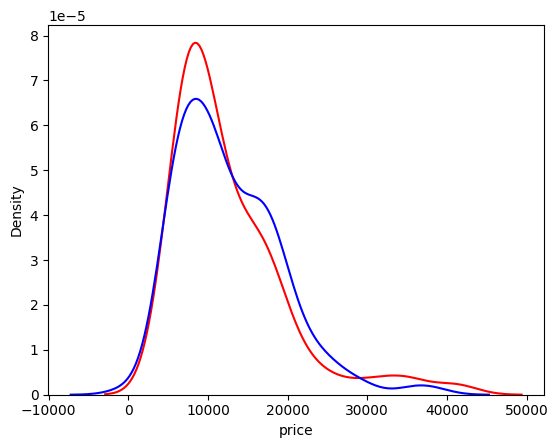

In [25]:
#plotting seen data with actual values:
ax3=sns.distplot(y_train,hist=False,color='r')
sns.distplot(seen_data_yhat2,hist=False,color='b',ax=ax3)

This is how our MLR model has performed over already seen training data

C:\Users\HP\AppData\Local\Temp\ipykernel_3684\4219107976.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax4=sns.distplot(y_test,hist=False,color='r')
C:\Users\HP\AppData\Local\Temp\ipykernel_3684\4219107976.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unseen_data_yhat2,hist=Fals

<Axes: xlabel='price', ylabel='Density'>

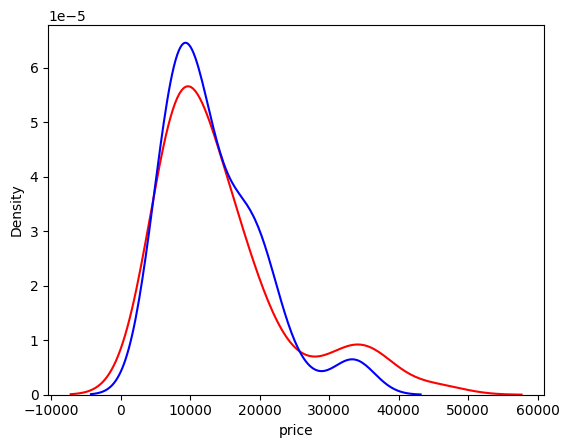

In [26]:
#plotting useen data with actual values:
ax4=sns.distplot(y_test,hist=False,color='r')
sns.distplot(unseen_data_yhat2,hist=False,color='b',ax=ax4)

This is how our MLR model has performed over  unseen testing data

In [27]:
# the r2 scores also differ for seen and unseen data

In [28]:
# seen data r2 score
lm2.score(x_train[['engine-size','curb-weight','horsepower','highway-mpg']],y_train)

0.8027498976932894

In [29]:
# unseen data r2 score
lm2.score(x_test[['engine-size','curb-weight','horsepower','highway-mpg']],y_test)

0.756196223652564

we can clearly see ,r2score(testing data)<r2score(training data),hence our MLR model performed a little poorly over testing data(unseen data) than on training data

-----------------------------------------

### Cross-validating our SLR and MLR models:

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [32]:
#calculating r2 scores for our SLR model with 4 folds:

slr_cross_score=cross_val_score(lm1,x_data[['engine-size']],y_data,cv=4)#NOTE-its x_data and y_data, not x_train or y_test etc
slr_cross_score

# we can see that our SLR model can have an R2 score of 0.81, whereas we have found it to be 0.78 using train_test_split;
# thus we can use better training data for our SLR model

array([0.81896217, 0.78709926, 0.70004194, 0.39608997])

In [35]:
#calculating r2 scores for our MLR model with 4 folds:
mlr_cross_score=cross_val_score(lm2,x_data[['engine-size','curb-weight','horsepower','highway-mpg']],y_data,cv=4)
mlr_cross_score

# we can see that our MLR model can have an R2 score of 0.84, whereas we have found it to be 0.74 using train_test_split;
# thus we can use better training data for our MLR model

array([0.84466574, 0.7858922 , 0.56412244, 0.46368952])

-----------------------------

## Overfitting and Underfitting:

Over and underfitting are usually a phenomenon of polynomial regression 
An overfitted model has a negative r2score

In [42]:
#Making a overfitted Polynomial regression model:

predictor=x_data['engine-size']
target=y_data# ydta is price itself

In [57]:
#deliberately overfitting the model
func=np.polyfit(predictor,target,13)
eq=np.poly1d(func)

In [58]:
print(eq)
#see how big the magnitude of coefficients have become for a 10th order polynomial;it is deem to overfit

           13            12             11             10             9
1.879e-21 x  - 4.69e-18 x  + 5.298e-15 x  - 3.583e-12 x  + 1.616e-09 x
             8             7           6         5         4
 - 5.13e-07 x + 0.0001178 x - 0.01977 x + 2.427 x - 214.9 x
              3             2
 + 1.334e+04 x - 5.497e+05 x + 1.346e+07 x - 1.481e+08


In [59]:
yhat3=eq(predictor)
yhat3[0:5]

array([14498.02165037, 14498.02165037, 15709.01277506,  9533.98728889,
       15512.90693617])

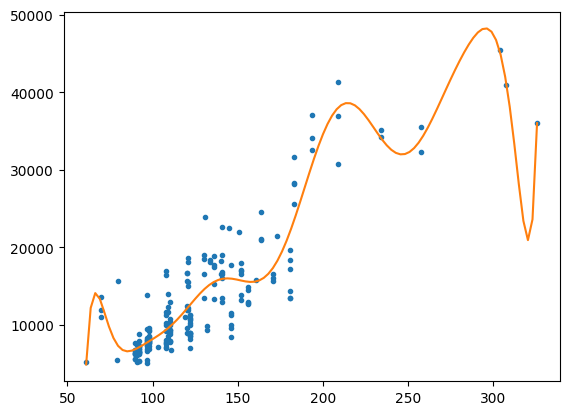

In [60]:
x_new=np.linspace(predictor.min(),predictor.max(),100)
y_new=eq(x_new)
plt.plot(predictor,target,'.',x_new,y_new,'-')

#the model is heavily overfitted

In [61]:
#the r2 score for an overfitted polynomial regression model will be negative

from sklearn.metrics import r2_score

r2_poly=r2_score(y_data,yhat3)
r2_poly

#somehow this is +ve(check this later)

0.8458883039331981

------------------------------------------------

# SOME EXTRA INFO.:

cross_val_predict:

from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression 
lre=LinearRegression()
yhat = cross_val_predict(lre,x_data[['attribute_1']], y_data,cv=4)

Ridge Regression and Prediction	:
To create a better fitting polynomial regression model, like , one that avoids overfitting to the training data,
we use the Ridge regression model with a parameter alpha that is used to modify the effect of higher-order parameters on 
the model prediction.

from sklearn.linear_model import Ridge
pr=PolynomialFeatures(degree=2) x_train_pr=pr.fit_transform(x_train[['attribute_1', 'attribute_2', ...]])
x_test_pr=pr.fit_transform(x_test[['attribute_1', 'attribute_2',...]])
RigeModel=Ridge(alpha=1)
RigeModel.fit(x_train_pr, y_train)
yhat = RigeModel.predict(x_test_pr)

Grid Search:
Use Grid Search to find the correct alpha value for which the Ridge regression model gives the best performance.
 It further uses cross-validation to create a more refined model.

 from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
parameters= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, ...]}]
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4) Grid1.fit(x_data[['attribute_1', 'attribute_2', ...]], y_data)
BestRR=Grid1.best_estimator_
BestRR.score(x_test[['attribute_1', 'attribute_2', ...]], y_test)